# 2way Partial Dependence Plots (Fake Data Exampe)
Here I created some fake data to simulate what would happen if there was an opposing 2-way relationship hidden in the data. This shows how not only does the model catch it.. but the fact that it exists can be hidden from view if you are only looking at 1-way PDP plots.

#### Library Imports

In [1]:
### Standard Imports - Sorry PEP8 fans, do not look below
import pandas as pd, numpy as np, os, re, json, sys
from pathlib import Path
from datetime import datetime
import datarobot as dr

## Specific Imports
from joshberry.pdp2way import *


#### DataRobot API tokens (I save my API token as an environmental variable)
ENDPOINT_URL = "https://app.datarobot.com/api/v2"

if os.environ.get("DR_API_TOKEN") == None:
    API_TOKEN = "OR__pasteyourtokenherefromthedatarobotbyclickinginthetopright"
else:
    API_TOKEN = os.environ.get("DR_API_TOKEN")

### Display options for notebooks
pd_options = {'display.max_rows': 25,'display.max_columns': 500}
[pd.set_option(option, setting) for option, setting in pd_options.items()]

### set path directories
curr_dir = Path(os.getcwd())
data_dir = Path(curr_dir.parents[0] / 'data/')
artifacts_dir = Path(curr_dir.parents[0] / 'artifacts/')

print('Current Directory is: ', str(curr_dir))

Current Directory is:  /Users/josh.berry/_use cases/hershey/2way/notebooks


#### Where is the code that actually runs the PDP?

The code is here: https://github.com/datarobot/data-science-scripts/blob/master/joshberry/joshberry/joshberry/pdp2way.py
        
This example imports it from my personal library, `from joshberry.pdp2way import *` but you can directly access the code from the link above.

In [2]:
FILENAME = 'fake_data_for_training.csv'

### Data Import

In [3]:
indata = pd.read_csv(Path(data_dir) / FILENAME)

#### Get DataRobot Model

In [4]:
dr.Client(API_TOKEN, ENDPOINT_URL)

Here we can refer to `project_id` and `model_id` which means we can analyze and get insights from models without having to deploy them first.

In [5]:
model_id = '6153550c376acc8d8659799f'
project_id = '615353dca051ca81114bffaa'
model = dr.Model.get(project_id, model_id)

#### Initialize settings for the PDP plots here
They will not run yet, but this will initialize the proper settings

In [6]:
pdp = partial_dependence_plots(indata, model, weight_col=None, sample=2000, k=10) 

#### Get Feature Impact
If this hasn't been calculated yet, it will kick off the jobs and might take a while to run. Just be patient.
If it already ran in the past, it will return quickly.

In [7]:
pdp.get_feature_impact()[0:20]

[('region', 1844.16),
 ('is_gluen_free', 1511.94),
 ('product_type', 1137.35),
 ('customer_income', 121.97),
 ('price_per_lb', 68.82),
 ('number_of_competitor_products', 14.52),
 ('customer_birth_year', 6.4)]

#### Run PDP Plots
This will run the simulations according to the settings and show you the plot. You can access the raw data with `one_way` and `two_way` objects.

##### One-Way
Notice how we observe how gluten free candy has a relatively negative relationship to sales.

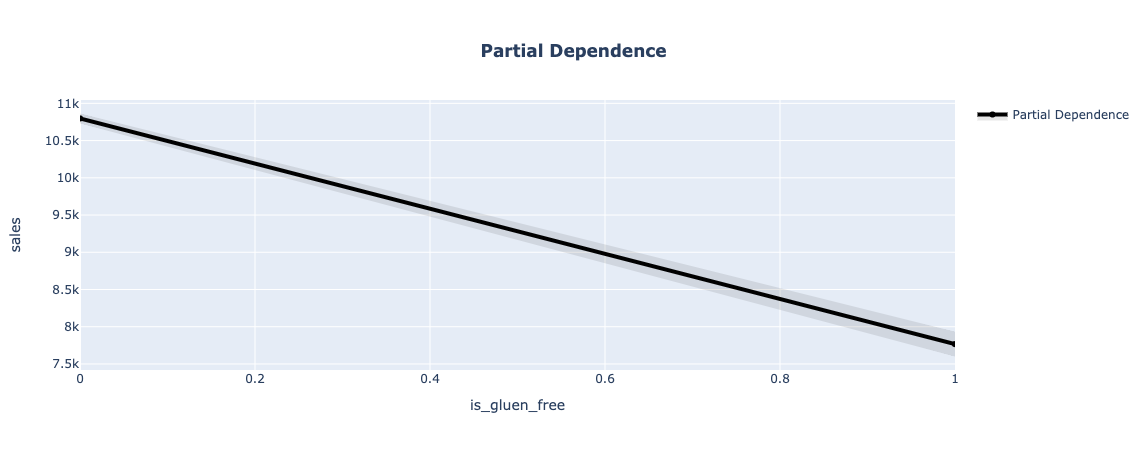

In [8]:
preds, one_way, two_way = pdp.create_pdp_plot(feature_1='is_gluen_free',
                                              feature_2=None,
                                              max_bins=10,
                                              quantiles=False,
                                              normalize=False,
                                              error_bars=True,
                                              include_ice=False,
                                              n=5)

##### Two-Way
By adding another dimension to simulate, we can notice how the gluten free relationship is actually quite interesting, because in the region Northwest, gluten_free seems to have a positive relationship to sales, but negative everywhere else.

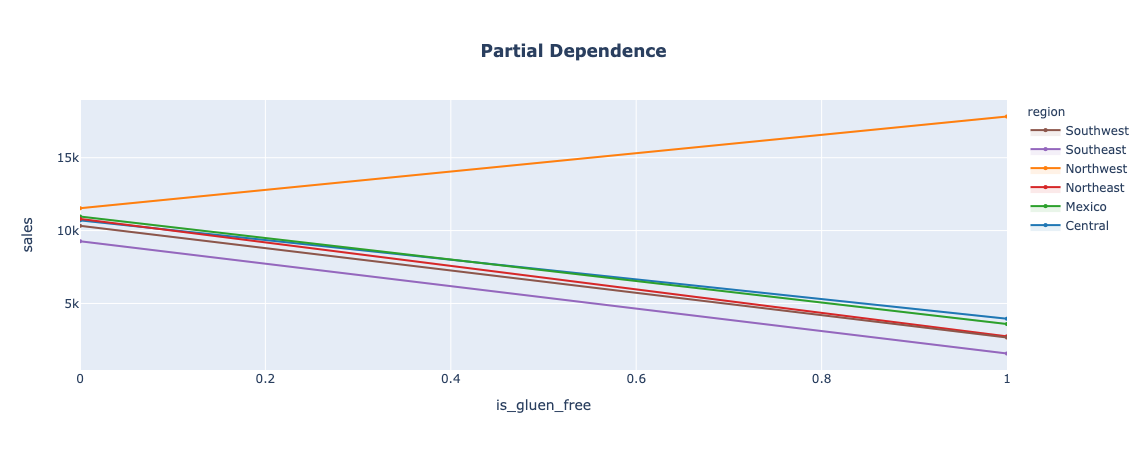

In [9]:
preds, one_way, two_way = pdp.create_pdp_plot(feature_1='is_gluen_free',
                                              feature_2='region',
                                              max_bins=10,
                                              quantiles=False,
                                              normalize=False,
                                              error_bars=True,
                                              include_ice=False,
                                              n=5)

In [10]:
two_way

is_gluen_free     region          mean          std  count
0               0    Central  10701.120905  2885.839754   2000
1               0     Mexico  10964.893869  2885.839754   2000
2               0  Northeast  10801.950720  2885.839754   2000
3               0  Northwest  11533.299324  2885.839754   2000
4               0  Southeast   9268.485768  2885.839754   2000
5               0  Southwest  10328.768466  2885.839754   2000
6               1    Central   3952.094718  2885.839754   2000
7               1     Mexico   3589.274359  2885.839754   2000
8               1  Northeast   2742.625052  2885.839754   2000
9               1  Northwest  17826.784285  2885.839754   2000
10              1  Southeast   1567.366685  2885.839754   2000
11              1  Southwest   2664.701033  2885.839754   2000

#### Run a Loop of Two-Way Comparisons

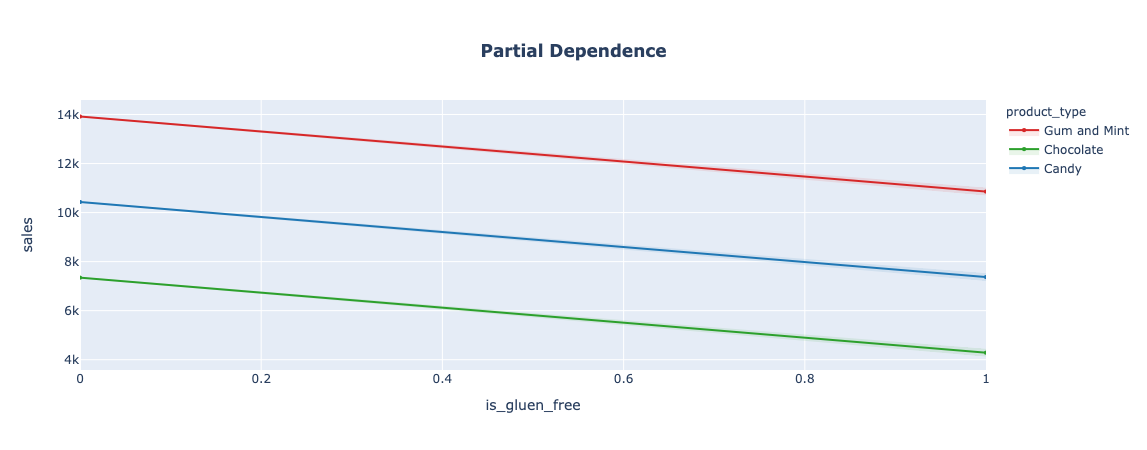

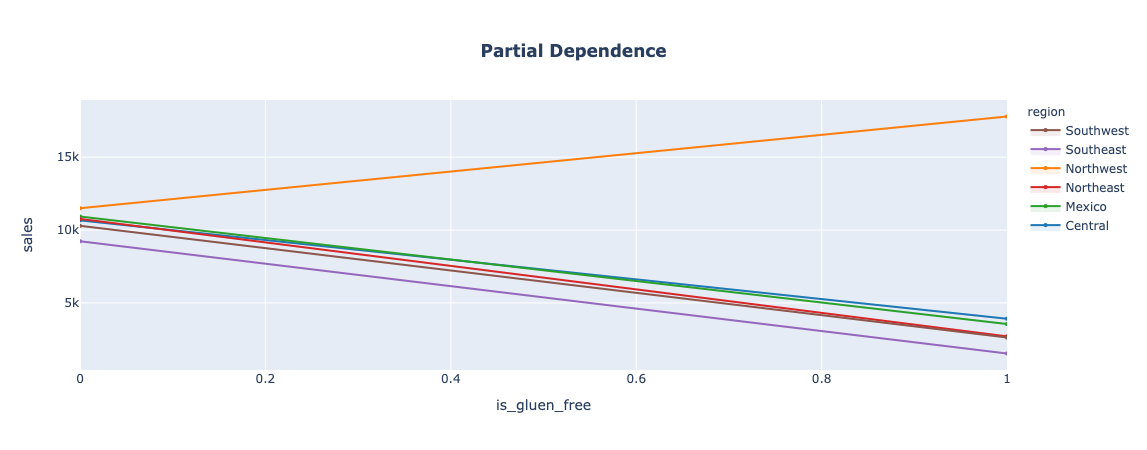

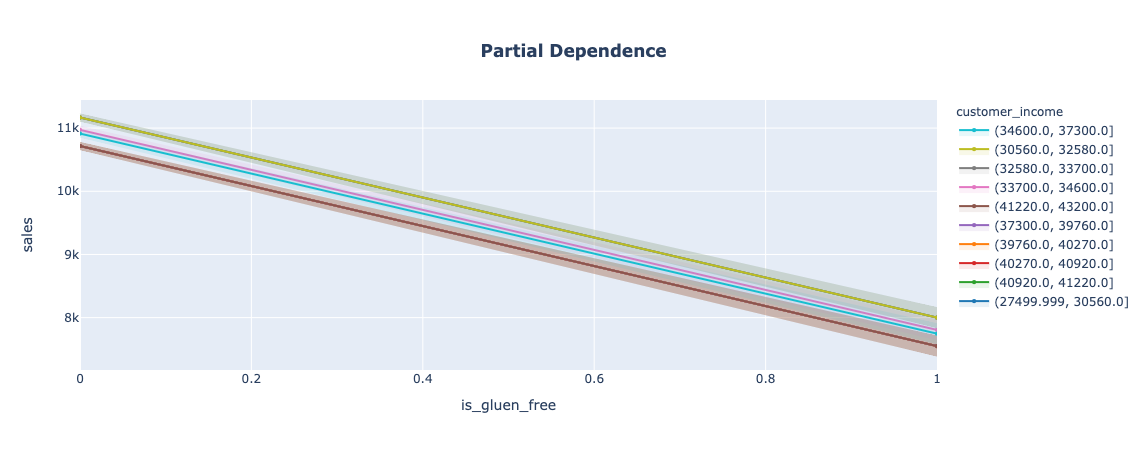

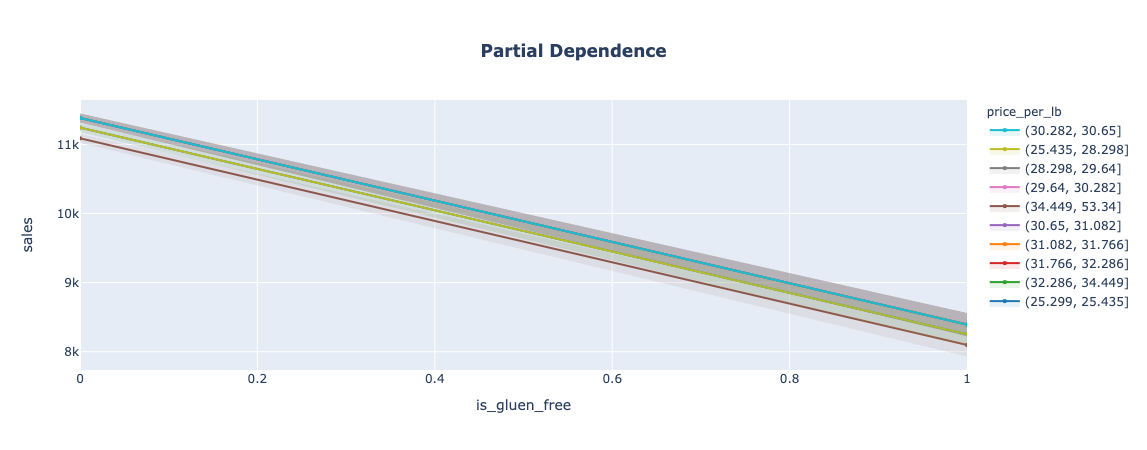

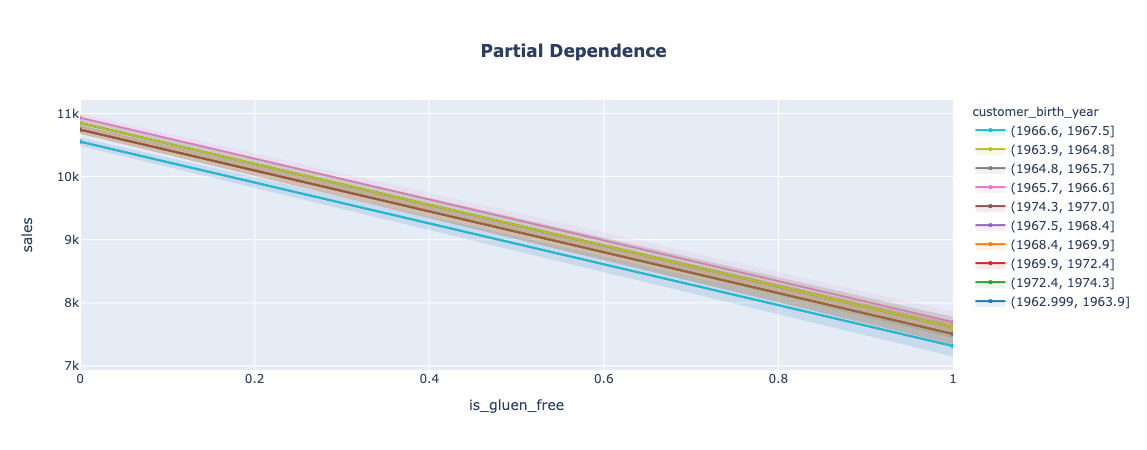

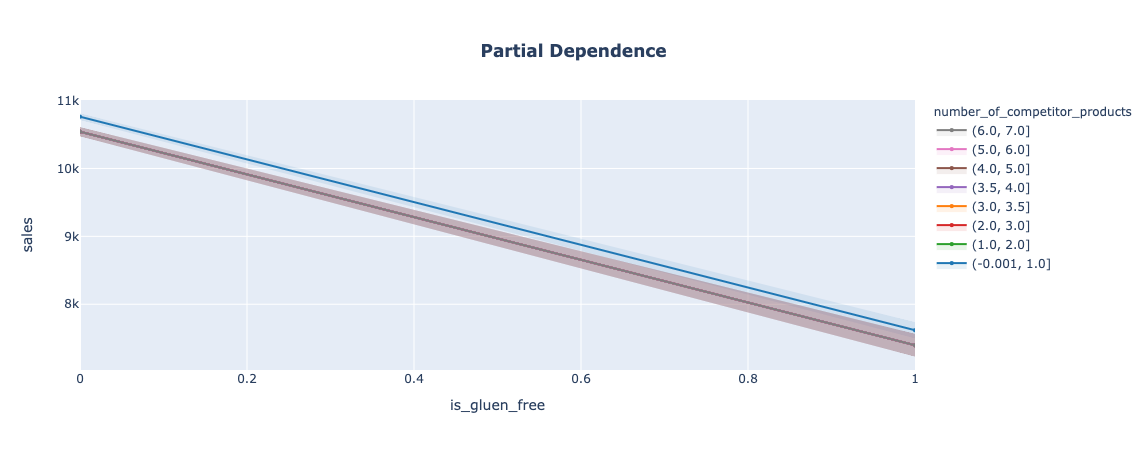

In [11]:
main_var = 'is_gluen_free'
vars_to_loop = ['product_type','region','customer_income','price_per_lb','customer_birth_year','number_of_competitor_products']

for v in vars_to_loop:
    preds, one_way, two_way = pdp.create_pdp_plot(feature_1=main_var,
                                                  feature_2=v,
                                                  max_bins=10,
                                                  quantiles=True,
                                                  normalize=False,
                                                  error_bars=True,
                                                  include_ice=False,
                                                  n=5)